In [13]:
# imports
import requests                 
from bs4 import BeautifulSoup   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import statistics
import scipy.stats as stats
import seaborn as sns
import pylab
import itertools 
import csv
import selenium
from selenium import webdriver
import statsmodels
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import durbin_watson
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network, preprocessing, model_selection, metrics, cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, mutual_info_score, rand_score, adjusted_rand_score, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [14]:
import streamlit as st

In [15]:
#cleaning up and reordering hte data for ease of use
match = pd.read_csv('match_data.csv').fillna(0).iloc[:, 1:]
players = pd.read_csv('player_data.csv').fillna(0).iloc[:, 1:]
events = pd.read_csv('event_data.csv').fillna(0).iloc[:, 1:]
players.rename(columns={'id': 'match_id'}, inplace=True) #conform the Id column across dataframes
players = players.iloc[:, [5, 0, 6, 15, 16, 28, 17, 29, 30, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 33, 34, 35, 36, 37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58]]
events = events.iloc[:, [9, 0, 1, 2, 3, 4, 5, 6, 7, 8]] #reorder match_id to front

In [33]:
len(match[match['match_season'] > 2022])

151

In [31]:
players[players['player_id'] == 130758].shape()

37

In [16]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output

In [17]:
app = JupyterDash(__name__)

In [18]:
app.layout = html.Div(
    [
        html.H1("Team Selector"),
        
        html.Label("Select team formation"),
        dcc.Dropdown(
            id='stock-selector',
            options=[
                {'label': 'AAPL', 'value': 'AAPL'},
                {'label': 'GOOGL', 'value': 'GOOGL'},
                {'label': 'MSFT', 'value': 'MSFT'},
            ],
            value='AAPL'
        ),

        dcc.Graph(id='stock-price-chart'),
])


In [19]:
@app.callback(
	Output('stock-price-chart', 'figure'),
	[Input('stock-selector', 'value')]
)
def update_chart(selected_stock):
	stock_data = yf.download(selected_stock, start='2022-01-01',
							end='2023-01-01')
	fig = px.line(stock_data, x=stock_data.index, y='Close',
				title=f'{selected_stock} Stock Price Analysis')
	return fig

In [20]:
if __name__ == '__main__':
	app.run_server(mode='external',debug=False)


Dash app running on http://127.0.0.1:8050/


In [12]:
st.write("""
# My first app
Hello *world!*
""")

st.line_chart(match['match_season'])

2024-05-19 12:59:22.447 
  command:

    streamlit run C:\Users\jonat\.conda\envs\158222\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

# Solution design
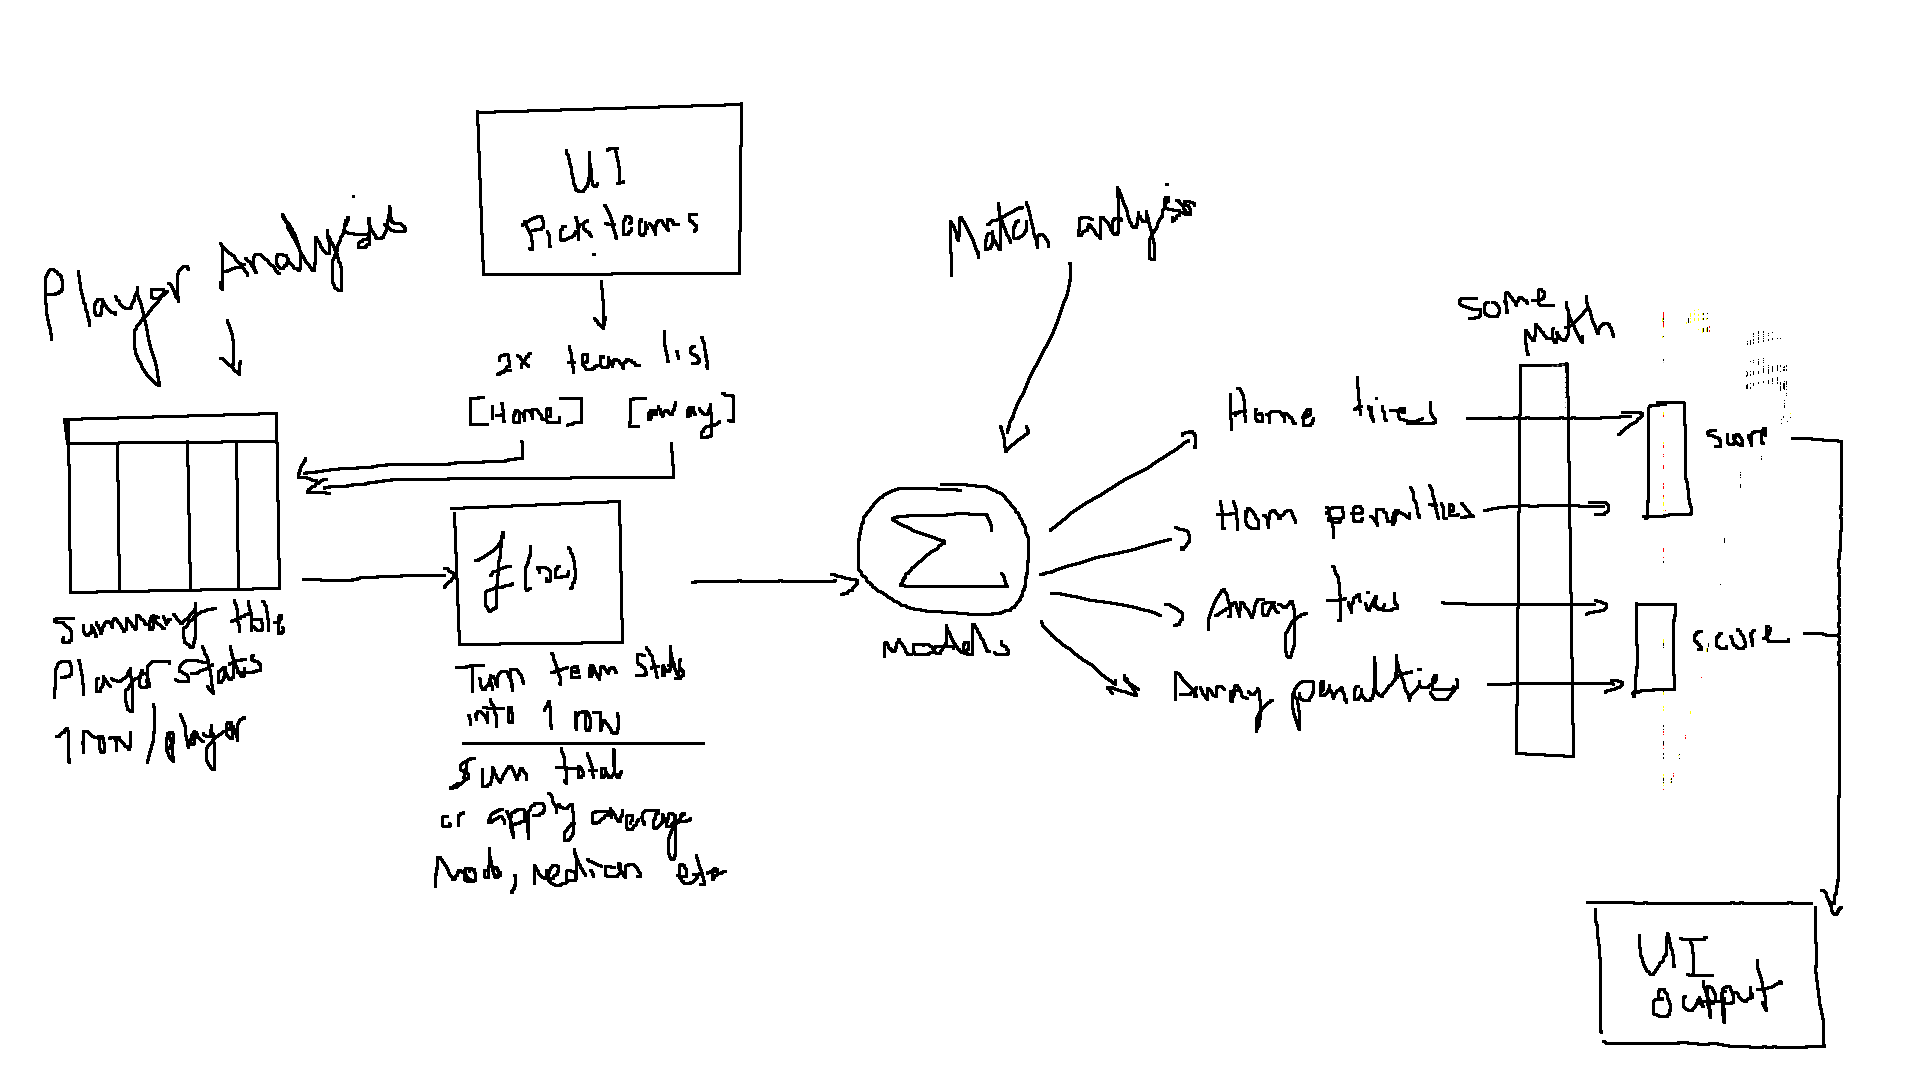

#John

I'll work on the analysis of the data to find out what predicts winning best. We wcan submit the analysis as part of the report as an appendix.

I am thinking to go on regular regression to find the best predictors, then to use classification to make the best model.

We can perahps also do some exploratory data analysis, and perform some clustering on the players to see if there are some meaningful distinctions betwee them which we can use in the app to lable them as 'try scorer' or 'defender' or 'ball stealer'.

I can't get this all done in the weekend, but can do it easily early next week.

I can also figure out an equation for probability of winning a match. Based on team A and team B aggregate performance.

# Jonathan and Owen (call out what you'd like to do)

If one of you can do the front end, that'd be great.

We also nbeed some anlaysis ont he players. I reckon we need to rank them on the player stats. We can probably rank them on all stats. If we want to aggregate the stats as to who is a better attacker or defender I can call out the skills that fit where.

For gold plating, if we can somehow figure a way to aggregate across the picked team the liklihood of winning rucks, lineouts, scrums and maul, and the probability of tries, that woudl be great.

We then need a way to call the probability of winning based on the team picked.



# project deliverable requirements
A fantasy rugby team picker.

1.   users can pick their team from players in the last ten years of super rugby
 item
2.  users can pick an opposing team (gold plating, not Minimum viable product)
3.  users then see their team stats and the probability that their team will win
4.  Users will see in addition: probability to win rucks, mauls, lineouts, scrums and predicted tries, conversions, pnealty kicks etc.
    <br>
  a) these can be naive from the aggregate values of the players in the team. Sum the average stats across the team and divide the amount won by the total. For line outs we can look at the team match stats and the player's contribution to those won.


**Validations**
1. users can only pick a player once for their team
2. users can't pick a player in their team to play off against in the opposing team.

# Process


1.   read in data
2. reduce match data frame to the same columns as players
3. create XGBoost models
4. Train 4 models: home tries, away tries, home penalties, away penalties
5. export these models.
6. when users select the teams, predict the tries and multiply by 5.
7. When users select teams, we can predict tries and penalties, then multiply the predcited amount by the conversion success rate and penalty success rate of the player in the kicker posiiton and add this value to the total score



# John checklist
given numerica data in and out, on a supervised mode, opted to use XGBoost. A decision tree style model which is performance optimised.

1. make feature selection funciton **-> Done**
2. Identify the best predictors** -> Done**: these were tries, conversions, penalties, drop goals
3. Run the model selection over the predictors -> **currently doing**; will need to do some feature engineering to reduce overall variables. Feature selection comes back with many features... and there is multicolinearity in these features (rucks won, rucks total, ruck lost etc). Can pretty much drop dropgoals, NZ doesn't do that much.
4. Create classificaiton model feature seleciton **-> Done**
5. Run the classification model on the dataset. (shuodl be obviouse)
6. Update feature seleciton model to use XGBooster, regression. If not, use decision treeregressor() -> Done

7. Figure out how to predict a singular value with the model

# Code Notes

Decision Tree classificaiton seems to be the best performing classifier so far with accuracy of 0.8. Try also KNN and XGBoost

In [ ]:
#go to conda terminal and run: https://xgboost.readthedocs.io/en/stable/install.html
pip install xgboost

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import csv
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 50, 50
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
def train_model(y, X):
    #uses XGBoost native API
    variable = y.name
    print('Model training for ', variable, '\n')

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6,  test_size=0.2)

    #Train the model
    model = XGBRegressor(objective='reg:squarederror', random_state = 6, learning_rate=0.1,)# max_depth=4,)# booster='gblinear',
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print('----------------------------------------------------------------------')
    print('---------------------------Model Evaluation---------------------------')
    print('    Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
    print('     Mean Squared Error: ', mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error: ', mean_squared_error(y_test, predictions, squared=False))

    print('----------------------------------------------------------------------')
    print('-------------------------Regression Results---------------------------')

    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, predictions, color = 'black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values')
    plt.show()

    print('----------------------------------------------------------------------')
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=y_test, y=predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Violin Plot of Predicted Values for Each True Value')
    plt.show()

    print('----------------------------------------------------------------------')
    residuals = y_test - predictions
    plt.figure(figsize=(10, 5))
    #plt.hist(residuals, bins=20, color = 'grey')
    sns.displot(residuals, color = 'black', kde=True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

    #debug to show predicitons
    #test = pd.DataFrame(y_test).reset_index()
    #pred = pd.DataFrame(predictions).round()
    #df = pd.concat([test, pred], axis=1)
    #print(df)

    return model

In [ ]:
match = pd.read_csv('match_data.csv').fillna(0).iloc[:, 1:]
players = pd.read_csv('player_data.csv').fillna(0).iloc[:, 1:]
#events = pd.read_csv('event_data.csv').fillna(0).iloc[:, 1:]
players.rename(columns={'id': 'match_id'}, inplace=True) #conform the Id column across dataframes
players = players.iloc[:, [5, 0, 6, 15, 16, 28, 17, 29, 30, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 33, 34, 35, 36, 37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58]]
#events = events.iloc[:, [9, 0, 1, 2, 3, 4, 5, 6, 7, 8]] #reorder match_id to front

#drop cancelled events (loses about 81)
match.drop(match[match['match_status']=='Cancelled'].index, inplace=True)

a = match.iloc[:, 0:26]
b = match.iloc[:, [27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 42, 44, 45, 46, 52, 54, 58, 67, 69, 70, 71, 72, 73, 74, 75, 76, 78, 82, 84, 85, 86, 92, 94, 98]]
match_2 = pd.concat([a,b], axis=1)

#remove point scoring kicks. Calculate conversion based off conv. rate * tries scored. Penalty rate * penalties conceded
match_3 = match_2.drop(match_2.iloc[:, [36, 37, 38, 29, 53, 54, 55, 56]], axis =1)

In [ ]:
#home tries
home_tries = train_model(match_3.iloc[:, 15], match_3.iloc[:, 26:])

In [ ]:
#away tries
away_tries = train_model(match_3.iloc[:, 16], match_3.iloc[:, 26:])

In [ ]:
#home penalties
home_penalties = train_model(match_3.iloc[:, 19], match_3.iloc[:, 29:])

In [ ]:
#away penalties
away_penalties = train_model(match_3.iloc[:, 20], match_3.iloc[:, 29:])

In [ ]:
#home_tries_file = 'home_tries+predictor_mode.pkl'

#with open(home_tries_file, 'wb') as file:
 #   pickle dump(home_tries, file)

filename = 'home_tries_model.sav'
joblib.dump(home_tries, filename)

filename = 'home_penalties_model.sav'
joblib.dump(home_penalties, filename)

filename = 'away_tries_model.sav'
joblib.dump(away_tries, filename)

filename = 'away_penalties_model.sav'
joblib.dump(away_penalties, filename)

In [ ]:
#to predict ensure:
new_array = np.asarray([[301, 1, 9, 89, 150, 20, 15, 100, 11, 2, 3, 72, 12, 260, 5, 15, 8, 108, 92, 16, 8, 122, 14, 3, 64, 11]])
    new_array = new_array.reshape(1, 26)
    #print(new_array.shape)
    #print(new_array)

    print(model.predict(new_array))

# variables used in model
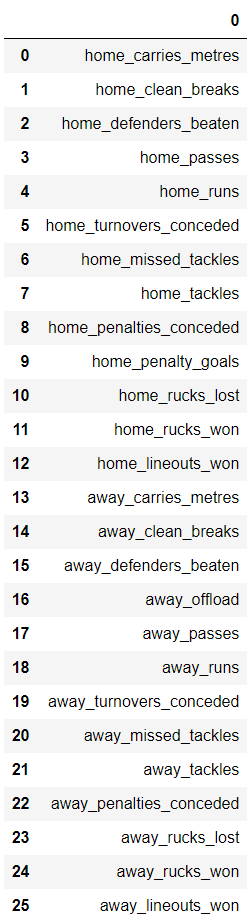

same as variables from players. To help copy:

0.        home_carries_metres,
1.         home_clean_breaks
2.     home_defenders_beaten,
3.               home_passes,
4.                 home_runs,
5.   home_turnovers_conceded,
6.       home_missed_tackles,
7.              home_tackles,
8.   home_penalties_conceded,
9.        home_penalty_goals,
10.          home_rucks_lost,
11.           home_rucks_won,
12.        home_lineouts_won,
13.      away_carries_metres,
14.        away_clean_breaks,
15.    away_defenders_beaten,
16.             away_offload,
17.              away_passes,
18.                away_runs,
19.  away_turnovers_conceded,
20.      away_missed_tackles,
21.             away_tackles,
22.  away_penalties_conceded,
23.          away_rucks_lost,
24.           away_rucks_won,
25.        away_lineouts_won,





